In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import numpy as np

In [25]:
df = pd.read_csv(r"D:/PowerBI_Projects/Python_Data_Analysis_Project/Covid-90/covid_19_india.csv")

In [26]:
df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [40]:
df.isnull().sum()


Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [41]:
df.columns = df.columns.str.strip()
df.dropna(subset=['Cured', 'Deaths', 'Confirmed'], inplace=True)

In [42]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [112]:
df[['Cured', 'Deaths', 'Confirmed']] = df[['Cured', 'Deaths', 'Confirmed']].replace([np.inf, -np.inf], 0)

In [47]:
df[['Cured', 'Deaths', 'Confirmed']] = df[['Cured', 'Deaths', 'Confirmed']].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  int64  
 7   Deaths                    15086 non-null  int64  
 8   Confirmed                 15086 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [9]:
vaccine_df = pd.read_csv("D:/PowerBI_Projects/Python_Data_Analysis_Project/Covid-90/covid_vaccine_statewise.csv")

In [10]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# drop the unnessary colums from first file 

In [71]:
df.drop(["Sno" ,"Time","ConfirmedIndianNational" ,"ConfirmedForeignNational"] , inplace =True ,axis =1)

In [12]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


# change format of the date

In [22]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')
df.head()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


# Active Cases

In [72]:
df['Active_Cases'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
15081,2021-05-19,Telangana,485644,3012,536766,48110
15082,2021-05-19,Tripura,36402,450,42776,5924
15083,2021-05-19,Uttarakhand,214426,5132,295790,76232
15084,2021-05-19,Uttar Pradesh,1483249,18072,1637663,136342
15085,2021-05-19,West Bengal,1026492,13576,1171861,131793


In [116]:
df.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Active_Cases            0
dtype: int64

In [117]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
statewise = pd.pivot_table(df , values = ["Confirmed" , 'Deaths' , 'Cured'], index = 'State/UnionTerritory', aggfunc = 'max')

# calculate Recovery Rate and Mortality Rate

In [57]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [58]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [60]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [61]:
statewise.style.background_gradient(cmap = "cubehelix")	

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506,4927480,83777,90.686934,1.541859
Karnataka,2272374,1674487,22838,73.688882,1.005028
Kerala,2200706,1846105,6612,83.886944,0.300449
Tamil Nadu,1664350,1403052,18369,84.300297,1.103674
Uttar Pradesh,1637663,1483249,18072,90.571076,1.103524
Andhra Pradesh,1475372,1254291,9580,85.015237,0.649328
Delhi,1402873,1329899,22111,94.798246,1.576123
West Bengal,1171861,1026492,13576,87.595030,1.158499
Chhattisgarh,925531,823113,12036,88.934136,1.300443


# top 10 active cases states


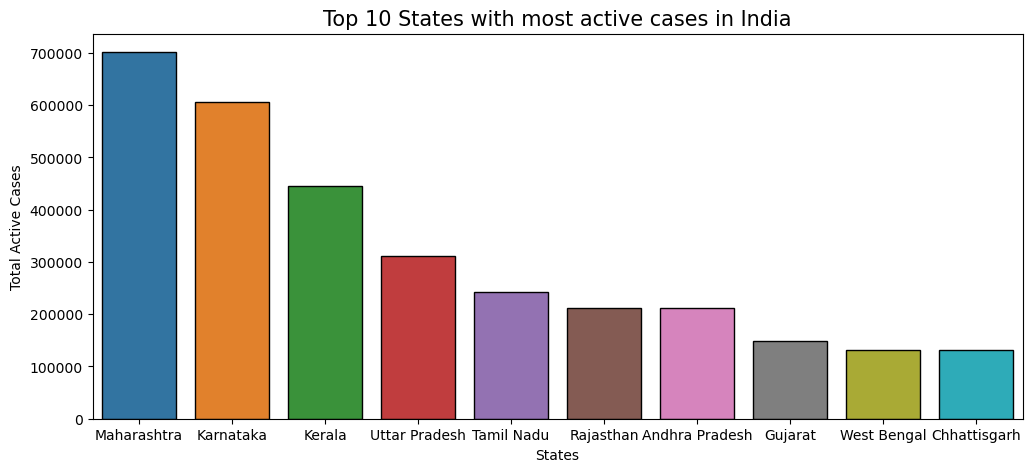

In [99]:
top_10_Active_cases = df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases' , 'Date']].sort_values(by = ['Active_Cases'] ,
                                                                                        ascending = False).reset_index()
fig = plt.figure(figsize = (12,5))
plt.title("Top 10 States with most active cases in India",size = 15)
ax = sns.barplot(data = top_10_Active_cases.iloc[:10], y ="Active_Cases", x ="State/UnionTerritory",edgecolor  ='black')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

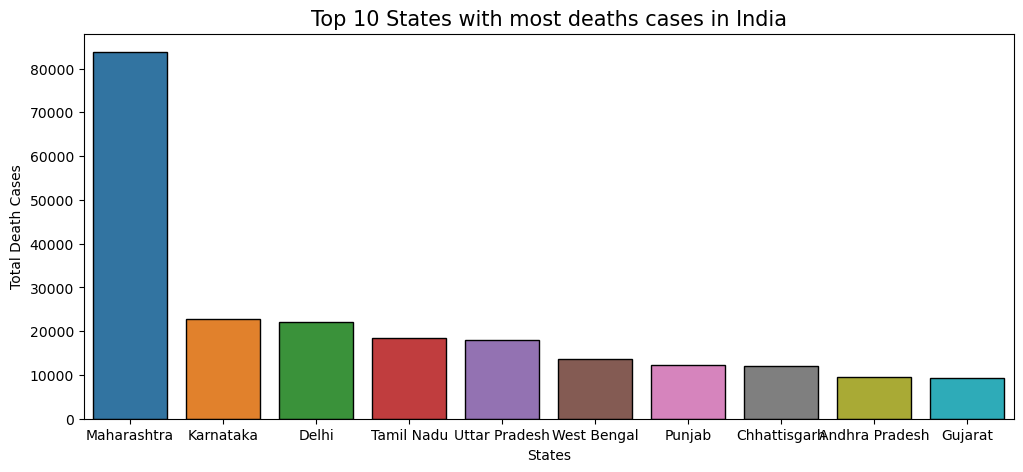

In [103]:
#states with highest deaths

top_10_Active_cases = df.groupby(by = 'State/UnionTerritory').max()[['Deaths' , 'Date']].sort_values(by = ['Deaths'] ,
                                                                                        ascending = False).reset_index()
fig = plt.figure(figsize = (12,5))
plt.title("Top 10 States with most deaths cases in India",size = 15)
ax = sns.barplot(data = top_10_Active_cases.iloc[:10], y ="Deaths", x ="State/UnionTerritory",edgecolor  ="black")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

# Growth Trend

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


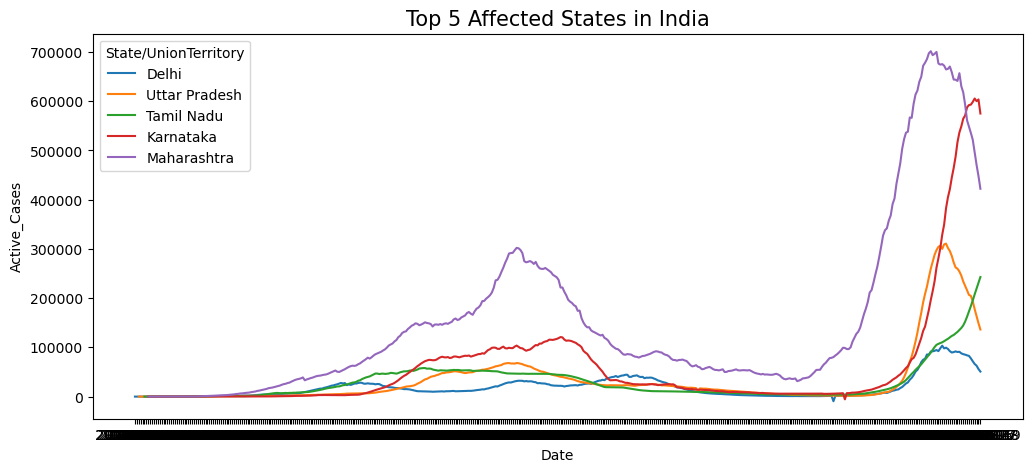

In [125]:
fig = plt.figure(figsize = (12,5))
ax = sns.lineplot(data=df[df["State/UnionTerritory"].isin(["Maharashtra", "Karnataka", "Delhi", "Tamil Nadu", "Uttar Pradesh"])],
                  x="Date", y="Active_Cases", hue="State/UnionTerritory")
plt.title("Top 5 Affected States in India" , size = 15)
plt.show()

In [126]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [128]:
vaccine_df.rename(columns = {'Updated On' : 'vaccine_Date'} ,inplace =True)
vaccine_df.head()

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [130]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [131]:
vaccine_df.isnull().sum()

vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [132]:
vaccination = vaccine_df.drop(columns= ["Sputnik V (Doses Administered)","AEFI", "18-44 Years (Doses Administered)",
                                        "45-60 Years (Doses Administered)", "60+ Years (Doses Administered)"] ,axis =1)

# male vs female vaccination

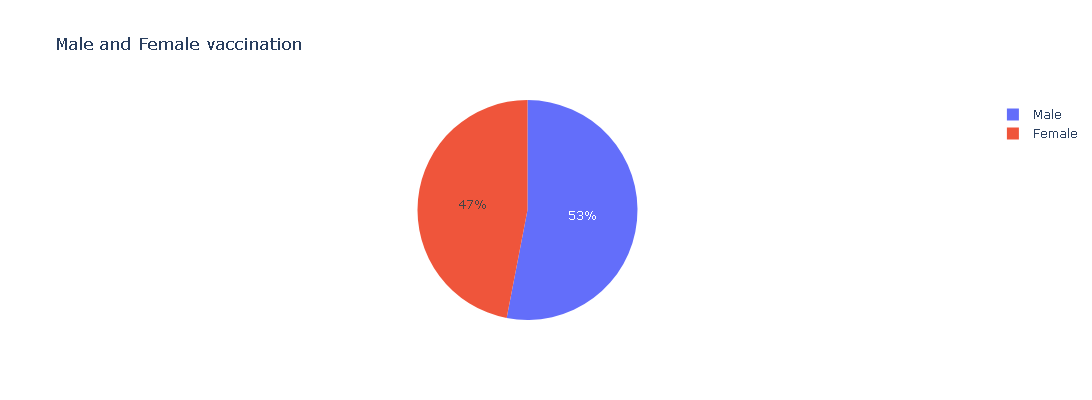

In [152]:
data = {
    'Gender': ['Male', 'Female'],
    'Count': [male, female]
}
df_pie = pd.DataFrame(data)
male = vaccine_df["Male(Individuals Vaccinated)"].sum()
female = vaccine_df["Female(Individuals Vaccinated)"].sum()
fig = px.pie(df_pie, names='Gender', values='Count',title ="Male and Female vaccination")
fig.update_layout(width=400, height=400)
fig.show()

# remove rows  where state is India

In [155]:
Vaccine = vaccine_df[vaccine_df.State!= 'India']
Vaccine

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
Vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"} ,inplace =True)
Vaccine.head()

C:\Users\OM\AppData\Local\Temp\ipykernel_2708\2050599688.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


# most vaccinated state


In [167]:
max_vac = Vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total' , ascending = False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


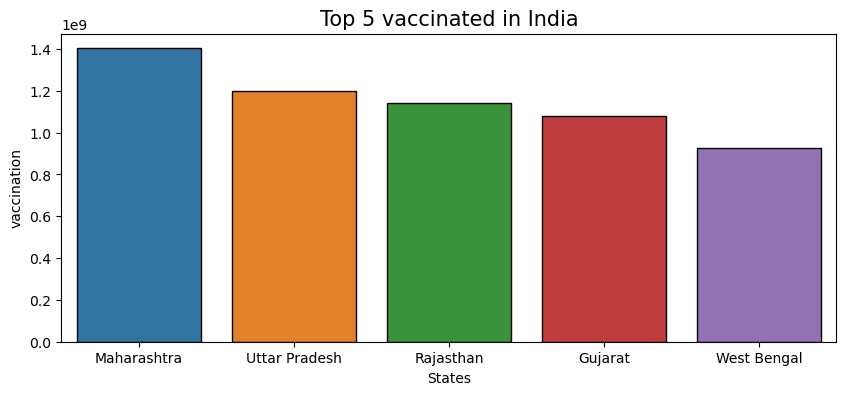

In [165]:
fig = plt.figure(figsize = (10,4))
plt.title("Top 5 vaccinated in India",size = 15)
ax = sns.barplot(data = top_10_Active_cases.iloc[:10], y =max_vac.Total, x =max_vac.index ,edgecolor  ="black")
plt.xlabel("States")
plt.ylabel("vaccination")
plt.show()